In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,precision_score

In [159]:
df = pd.read_csv('Creditcard_data.csv')
print(df.shape)
df.head()

(772, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [160]:
df['Class'].value_counts()

0    763
1      9
Name: Class, dtype: int64

In [161]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

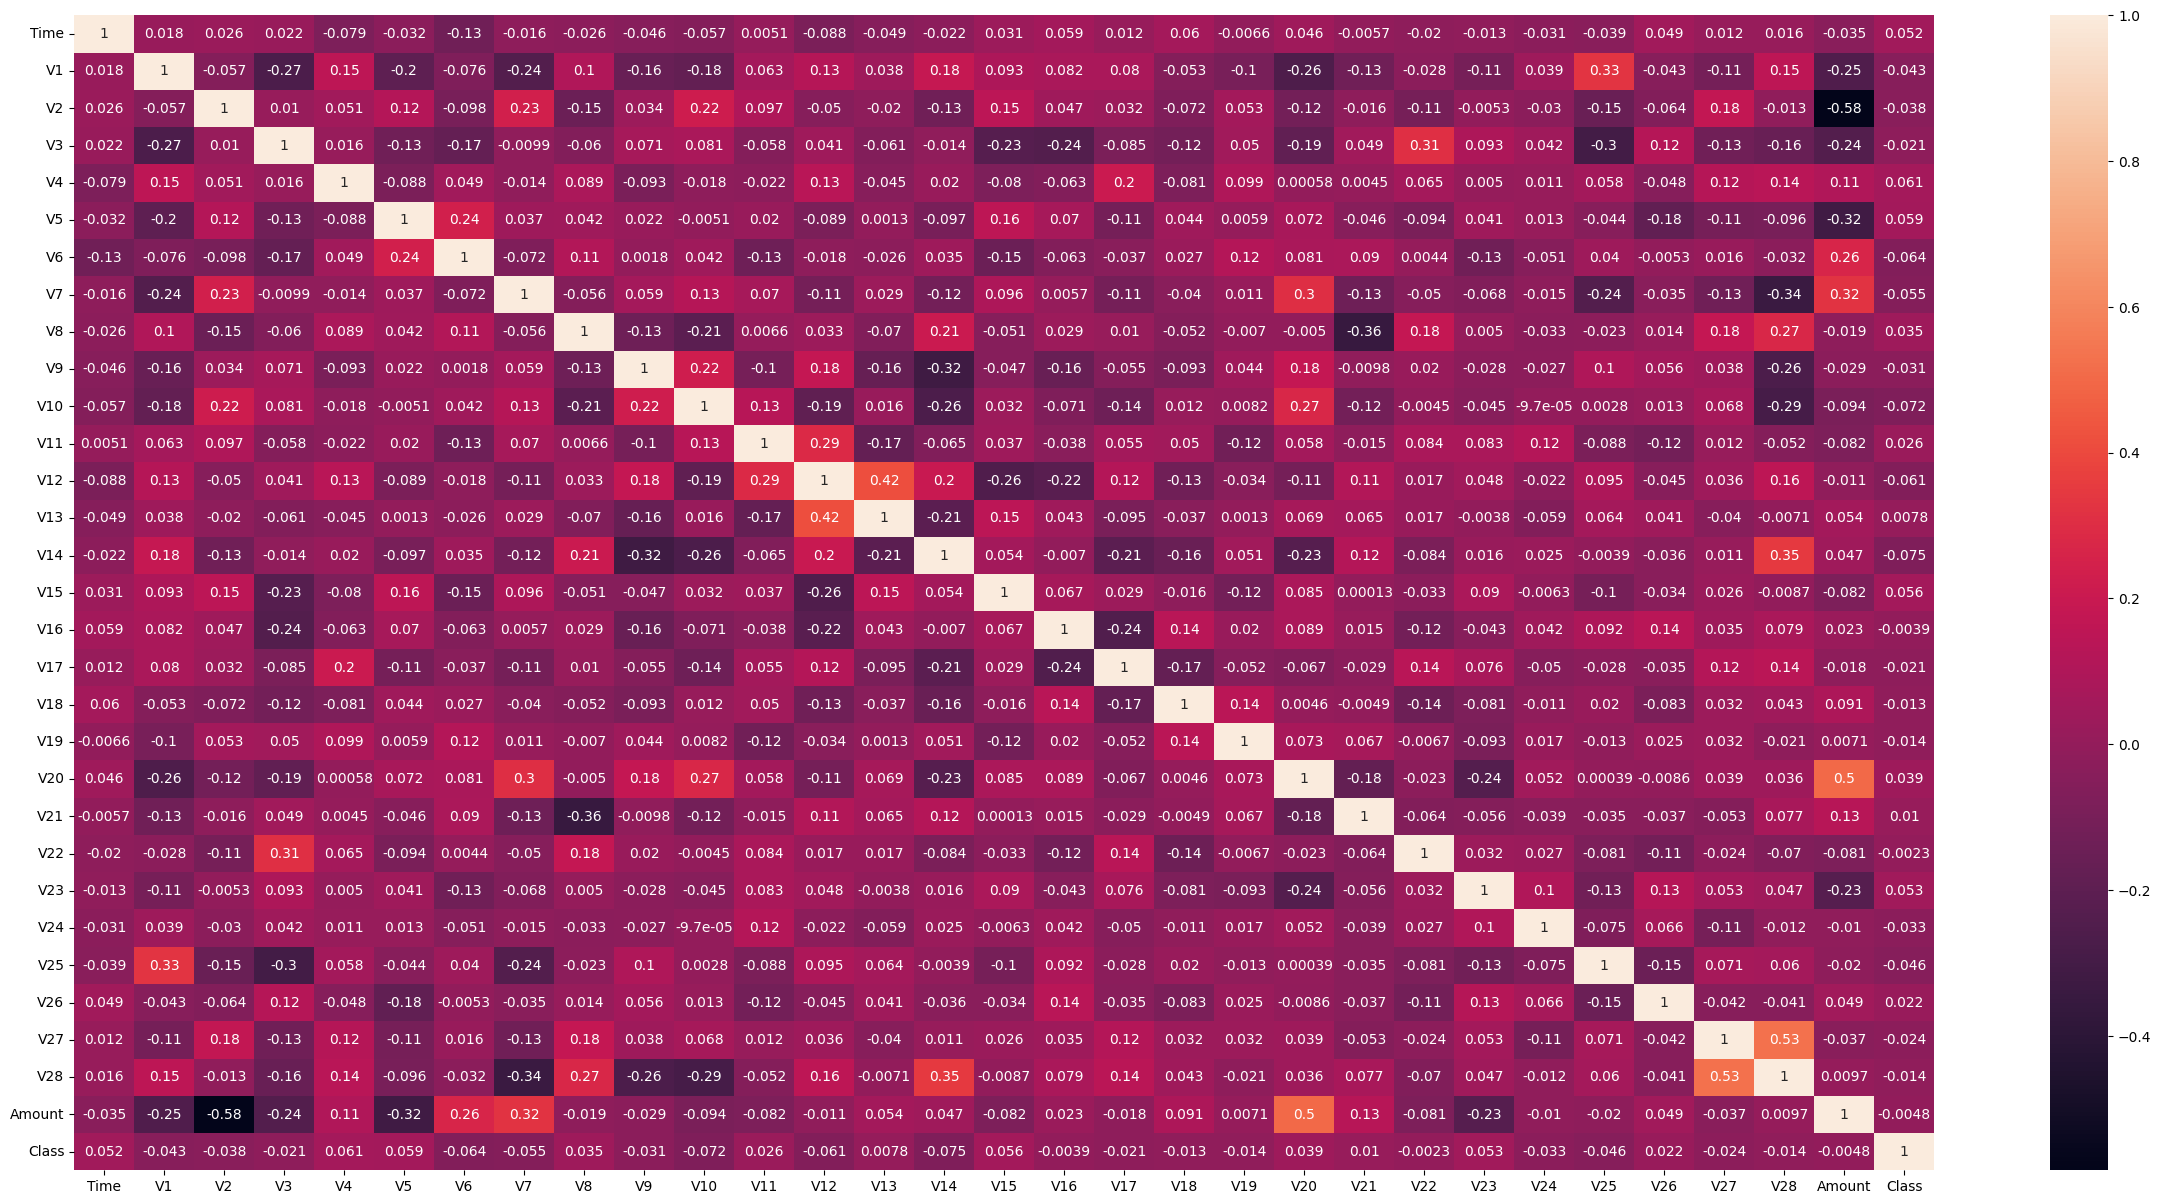

In [89]:
corr = df.corr()
plt.figure(figsize=(30,15))
sns.heatmap(corr,annot=True)
plt.show()

In [162]:
X = df.drop('Class',axis=1)
Y = df['Class']

In [163]:
Y.value_counts()

0    763
1      9
Name: Class, dtype: int64

In [164]:
smote = SMOTE(sampling_strategy='minority')
X , Y = smote.fit_resample(X,Y)

In [165]:
Y.value_counts()

0    763
1    763
Name: Class, dtype: int64

<h1> Training on whole data

In [166]:
models = {
    'logistic_regression':LogisticRegression(),
    'random_forest':RandomForestClassifier(max_depth=10,min_samples_leaf=4,random_state=0),
    'Decision_tree':DecisionTreeClassifier(),
    'SVM':SVC(),
    'K_nearest':KNeighborsClassifier(),
}

scores = ['Accuracy','Precision']
res = np.zeros(shape=(len(models),2))

In [179]:
#Function for predicting accuracy and precision
def calc(X,Y):
    X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
    print(X_train.shape)
    for i,key in enumerate(models):
        mod = models[key].fit(X_train,Y_train)
        y_p = mod.predict(X_test)
        
        res[i][0] = accuracy_score(y_p,Y_test)
        res[i][1] = precision_score(y_p,Y_test)
    
    table_np = tabulate(res, headers=scores, showindex=list(models.keys()), tablefmt='pretty')  
    print(table_np)    
    return
    

In [168]:
calc(X,Y)

c:\Users\SUNIL KUMAR\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


+---------------------+--------------------+--------------------+
|                     |      Accuracy      |     Precision      |
+---------------------+--------------------+--------------------+
| logistic_regression | 0.9313725490196079 | 0.9938650306748467 |
|    random_forest    | 0.9869281045751634 | 0.9938650306748467 |
|    Decision_tree    | 0.9771241830065359 | 0.9877300613496932 |
|         SVM         | 0.7124183006535948 | 0.7116564417177914 |
|      K_nearest      | 0.8594771241830066 | 0.9631901840490797 |
+---------------------+--------------------+--------------------+


In [169]:
df = X
df['Class'] = Y
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,477,-1.035298,0.518546,1.481576,0.478187,0.851087,-0.941710,0.614394,-0.036668,-0.345671,...,0.101277,0.256868,-0.274019,0.380335,0.364271,-0.404925,-0.076130,-0.127122,0.922544,1
1522,167,0.082906,0.549553,0.450739,0.119538,0.813565,0.241000,0.294713,0.136718,-0.121958,...,-0.130014,-0.385418,0.150826,-1.350403,-1.376285,0.075563,0.229732,0.228588,0.992384,1
1523,538,-1.746065,-0.020046,1.223620,-0.605333,0.964650,-0.266480,0.201124,0.159132,0.050180,...,-0.162350,-0.152406,-0.245892,-0.255175,-0.331735,0.258052,-0.338831,-0.377493,1.014282,1
1524,472,-2.955007,-3.008507,1.115777,2.200507,1.343340,-1.057967,0.348736,-0.071510,-0.265561,...,0.636780,0.429028,1.307584,-0.265379,0.284457,-0.158272,-0.246566,0.029004,506.902788,1


<h1> Sampling</h1>

In [189]:
#Simple Random Sampling
z = 1.96
p = 0.5
e = 0.05
sample_size = math.ceil((z**2*p*(1-p))/(e**2))
sample_size
samples = [df.sample(n=sample_size,random_state=0)]
print(samples[0].shape)
samples[0]['Class'].value_counts()

(385, 31)


0    200
1    185
Name: Class, dtype: int64

In [190]:
calc(samples[0].drop('Class',axis=1),samples[0]['Class'])

(308, 30)
+---------------------+--------------------+---------------------+
|                     |      Accuracy      |      Precision      |
+---------------------+--------------------+---------------------+
| logistic_regression | 0.922077922077922  | 0.9473684210526315  |
|    random_forest    | 0.987012987012987  |         1.0         |
|    Decision_tree    | 0.935064935064935  | 0.9736842105263158  |
|         SVM         | 0.5844155844155844 | 0.42105263157894735 |
|      K_nearest      | 0.6753246753246753 | 0.7631578947368421  |
+---------------------+--------------------+---------------------+


c:\Users\SUNIL KUMAR\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [191]:
#Stratified Sampling
z=1.96
p=0.5
e=0.05
s=0.7
sample_size=round((z**2*p*(1-p))/((e/s)**2))
samples = [df.groupby('Class', group_keys=False).apply(lambda x: x.sample(sample_size))]
print(samples[0].shape)
samples[0]['Class'].value_counts()

(376, 31)


0    188
1    188
Name: Class, dtype: int64

In [192]:
calc(samples[0].drop('Class',axis=1),samples[0]['Class'])

(300, 30)


c:\Users\SUNIL KUMAR\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


+---------------------+--------------------+--------------------+
|                     |      Accuracy      |     Precision      |
+---------------------+--------------------+--------------------+
| logistic_regression | 0.9078947368421053 |        1.0         |
|    random_forest    | 0.9868421052631579 |        1.0         |
|    Decision_tree    | 0.9342105263157895 |        1.0         |
|         SVM         | 0.6710526315789473 | 0.8571428571428571 |
|      K_nearest      | 0.7368421052631579 | 0.8571428571428571 |
+---------------------+--------------------+--------------------+


In [228]:
#Cluster Sampling
z=1.96
p=0.5
e=0.05
c=1.3
sample_size=round((z**2*p*(1-p))/((e/c)**2))
reshaped_df = df.groupby(np.arange(len(df)) // 2, sort=False).apply(lambda x: x.reset_index(drop=True))
random_samples = reshaped_df.sample(n=int(sample_size))
print(random_samples.shape)
print(random_samples['Class'].value_counts())
random_samples

(649, 31)
1    335
0    314
Name: Class, dtype: int64


,,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
539,1,439,-0.789033,0.419413,1.562140,0.173272,0.946472,-0.740999,0.798118,-0.115483,-0.139470,...,0.039265,0.189287,-0.201186,0.142514,0.143965,-0.380373,-0.057772,-0.076349,0.998612,1
556,0,404,-2.289828,1.941935,-1.597843,3.977155,-0.521242,-1.424308,-2.520910,1.381645,-2.752475,...,0.512179,-0.040058,-0.461486,0.320319,0.045596,0.177318,0.259359,-0.142182,0.016891,1
390,1,439,-1.604623,1.637381,-1.229925,3.342368,-0.489603,-1.355375,-2.015763,1.074131,-2.218162,...,0.357853,-0.190766,-0.347697,0.324743,0.079523,0.161299,0.204985,-0.108744,0.255692,1
473,0,403,-0.677003,0.436509,1.417935,0.165699,0.930428,-0.612091,0.732941,-0.082365,-0.137338,...,0.017441,0.115094,-0.155441,-0.053156,-0.055155,-0.321173,-0.020168,-0.036537,0.997493,1
524,0,420,-2.059307,1.668071,-0.997535,3.300758,-0.250185,-1.330515,-1.913117,1.108750,-2.289887,...,0.434844,0.022770,-0.427342,0.332109,0.107852,0.062412,0.194341,-0.140076,0.182727,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1,209,-0.742877,0.563252,1.207243,0.912388,1.053791,0.574723,0.215633,0.253663,-0.434722,...,-0.007178,0.166434,-0.370094,-0.793211,-0.014647,-0.251252,0.086313,0.089217,1.190000,0
255,1,377,1.166919,0.027049,0.513875,0.860965,-0.519452,-0.681147,0.074992,-0.187776,0.345399,...,-0.202750,-0.441391,-0.025782,0.452607,0.467223,0.262577,-0.023834,0.020521,40.830000,0
672,0,443,-1.482048,-2.046935,2.093470,1.027674,2.071874,0.484364,-1.780242,0.674125,0.761591,...,0.317166,0.897502,0.265913,-0.773091,-0.156547,0.741619,-0.105840,-0.140885,1.693282,1
666,1,166,0.066990,0.550040,0.460266,0.115404,0.823878,0.243993,0.300104,0.137573,-0.123174,...,-0.127491,-0.377623,0.148355,-1.352602,-1.377514,0.071974,0.229565,0.227859,0.990065,1


In [216]:
calc(random_samples.drop('Class',axis=1),random_samples['Class'])

(519, 30)


c:\Users\SUNIL KUMAR\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


+---------------------+--------------------+--------------------+
|                     |      Accuracy      |     Precision      |
+---------------------+--------------------+--------------------+
| logistic_regression | 0.9153846153846154 | 0.9242424242424242 |
|    random_forest    | 0.9923076923076923 |        1.0         |
|    Decision_tree    | 0.9769230769230769 | 0.9696969696969697 |
|         SVM         | 0.6615384615384615 | 0.6515151515151515 |
|      K_nearest      | 0.8692307692307693 | 0.9393939393939394 |
+---------------------+--------------------+--------------------+


In [225]:
#Systamatic Sampling
samples = df.iloc[::int(math.sqrt(len(df)))]
print(samples.shape)
print(samples['Class'].value_counts())
samples.head()

(40, 31)
0    20
1    20
Name: Class, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
39,29,1.110880,0.168717,0.517144,1.325407,-0.191573,0.019504,-0.031849,0.117620,0.017665,...,-0.037709,0.095701,-0.048198,0.232115,0.606201,-0.342097,0.036770,0.007480,6.54,0
78,50,-0.571521,1.071600,1.280110,0.542780,0.574439,-0.259359,1.061148,-0.410972,-0.179130,...,0.003559,0.561240,-0.199287,0.001387,-0.179530,-0.374116,0.071641,-0.175510,9.79,0
117,76,-1.024576,0.522289,1.787699,0.202672,-1.140803,-0.137831,-0.336555,0.670704,0.071670,...,0.315868,0.847565,0.148877,0.549791,-0.585131,0.325841,-0.068871,0.059713,50.00,0
156,98,-0.646513,1.004199,1.616224,-0.099628,-0.122477,-0.671327,0.656183,0.009755,-0.635963,...,-0.147934,-0.420046,0.061424,0.520997,-0.238845,0.030135,0.140481,0.101163,14.98,0


In [223]:
calc(samples.drop('Class',axis=1),samples['Class'])

(32, 30)
+---------------------+----------+--------------------+
|                     | Accuracy |     Precision      |
+---------------------+----------+--------------------+
| logistic_regression |  0.625   |        1.0         |
|    random_forest    |  0.875   |        1.0         |
|    Decision_tree    |  0.875   | 0.6666666666666666 |
|         SVM         |  0.125   |        0.0         |
|      K_nearest      |   0.25   |        0.0         |
+---------------------+----------+--------------------+


c:\Users\SUNIL KUMAR\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [232]:
#Bootstrap Sampling
z = 1.96
p = 0.5
e = 0.05
sample_size = math.ceil((z**2*p*(1-p))/(e**2))
sample_size
samples = df.sample(n=sample_size,replace=True)
print(samples.shape)
print(samples['Class'].value_counts())
samples

(385, 31)
1    196
0    189
Name: Class, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
78,50,-0.571521,1.071600,1.280110,0.542780,0.574439,-0.259359,1.061148,-0.410972,-0.179130,...,0.003559,0.561240,-0.199287,0.001387,-0.179530,-0.374116,0.071641,-0.175510,9.790000,0
25,22,-2.074295,-0.121482,1.322021,0.410008,0.295198,-0.959537,0.543985,-0.104627,0.475664,...,-0.403639,-0.227404,0.742435,0.398535,0.249212,0.274404,0.359969,0.243232,26.430000,0
1171,459,-1.354056,0.158478,1.031053,-0.492914,0.899896,-0.176505,0.274862,0.140391,-0.007627,...,-0.168768,-0.232332,-0.174263,-0.476520,-0.558709,0.205328,-0.222714,-0.253328,0.997878,1
95,64,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,0.025133,...,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.990000,0
278,199,-0.923892,0.568852,1.244236,-0.597473,1.084897,-0.376976,0.568215,-0.009272,-0.246538,...,-0.215560,-0.433264,-0.083938,-0.363649,-0.599897,-0.114448,0.101575,-0.033302,6.450000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,519,-2.120358,-0.886385,1.158212,0.205017,1.049109,-0.517945,0.285610,0.079655,-0.062670,...,0.066566,-0.008452,0.217285,-0.253955,-0.155165,0.127488,-0.318110,-0.260886,155.470504,1
469,346,1.507578,-1.092820,0.360102,-1.770940,-0.913849,0.678723,-1.380228,0.147690,-1.970261,...,-0.047078,0.360796,-0.137631,-1.122472,0.438241,-0.022090,0.072569,0.003450,6.000000,0
1197,85,1.237556,0.327127,0.265050,0.625685,-0.252696,-0.798322,0.041201,-0.123576,-0.044832,...,-0.270576,-0.779277,0.120707,0.152446,0.202518,0.103289,-0.019398,0.026441,2.690000,1
1333,166,0.066990,0.550040,0.460266,0.115404,0.823878,0.243993,0.300104,0.137573,-0.123174,...,-0.127491,-0.377623,0.148355,-1.352602,-1.377514,0.071974,0.229565,0.227859,0.990065,1


In [233]:
calc(samples.drop('Class',axis=1),samples['Class'])

(308, 30)
+---------------------+--------------------+--------------------+
|                     |      Accuracy      |     Precision      |
+---------------------+--------------------+--------------------+
| logistic_regression | 0.8831168831168831 |        1.0         |
|    random_forest    | 0.974025974025974  |        1.0         |
|    Decision_tree    | 0.948051948051948  |        1.0         |
|         SVM         | 0.7272727272727273 | 0.7741935483870968 |
|      K_nearest      | 0.7012987012987013 | 0.8709677419354839 |
+---------------------+--------------------+--------------------+


c:\Users\SUNIL KUMAR\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
